# Exploring $E_{\rm max}$

In [14]:
# imports
from importlib import reload

from zdm.tests import craco
from zdm import iteration as it
from zdm import misc_functions

# Load up CRACO

In [2]:
survey, grid = craco.load_craco()

Loading survey: CRAFT/CRACO_1_5000
FRB survey succeffully initialised with  100  FRBs
Initialised grid


In [8]:
surveys = [survey]
grids = [grid]

# Nominal values

## Show state

In [4]:
grid.state.cosmo

CosmoParams(H0=67.74, Omega_k=0.0, Omega_lambda=0.6910098315260953, Omega_m=0.3075, Omega_b=0.0486, Omega_b_h2=0.022301118935999998, fix_Omega_b_h2=True)

In [5]:
grid.state.energy

EnergeticsParams(lEmin=30.0, lEmax=41.4, alpha=0.65, gamma=-1.01, luminosity_function=0)

## Grab the constant

In [6]:
vparams = {}
vparams['lC'] = -0.9

In [13]:
C,llC,lltot=it.minimise_const_only(
            vparams,grids,surveys, Verbose=False)
vparams['lC'] = C
#
C,llC,lltot=it.minimise_const_only(
            vparams,grids,surveys, Verbose=False)
vparams['lC'] = C
C

2.522933492286061

## Plot

/home/xavier/Projects/FRB_Software/zdm/zdm/misc_functions.py:2115: RuntimeWarning: divide by zero encountered in log10
  zDMgrid=np.log10(zDMgrid)


Host: mean=278.77755364720525, median=151.3561248436209


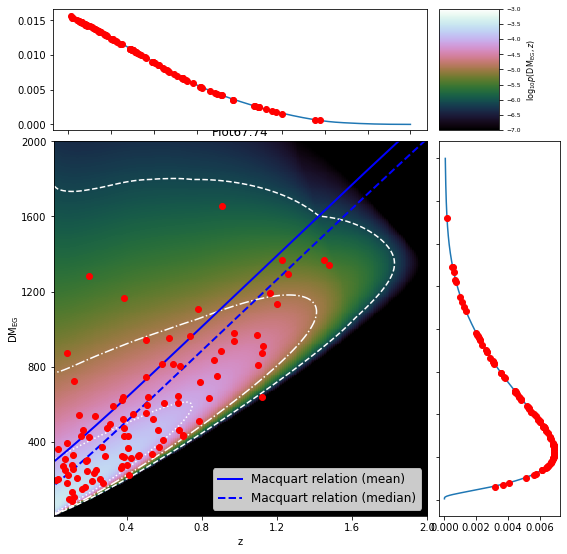

In [17]:
misc_functions.plot_grid_2(grid.rates,grid.zvals,grid.dmvals,zmax=2,DMmax=2000,
                             #name=os.path.join(Location,prefix+'ICS_optimised_grid.pdf'),
                             norm=2,log=True,label='$\\log_{10} p({\\rm DM}_{\\rm EG},z)$',
                             project=True,FRBDM=survey.DMEGs,FRBZ=survey.frbs["Z"],Aconts=[0.01,0.1,0.5],
                           Macquart=grid.state, showplot=True)

# Crank up $E_{\rm max}$

## Analyze

In [18]:
survey2, grid2 = craco.load_craco()

Loading survey: CRAFT/CRACO_1_5000
FRB survey succeffully initialised with  100  FRBs
Initialised grid


In [21]:
surveys2 = [survey2]
grids2 = [grid2]

In [20]:
vparams2 = {}
vparams2['lC'] = -0.9
vparams2['lEmax'] = 43.

In [23]:
C,llC,lltot=it.minimise_const_only(
            vparams2,grids2,surveys2, Verbose=False)
vparams2['lC'] = C
#
C,llC,lltot=it.minimise_const_only(
            vparams2,grids2,surveys2, Verbose=False)
vparams2['lC'] = C
C

/home/xavier/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


2.313184718391507

In [24]:
grid2.state.energy

EnergeticsParams(lEmin=30.0, lEmax=43.0, alpha=0.65, gamma=-1.01, luminosity_function=0)

## Plot

/home/xavier/Projects/FRB_Software/zdm/zdm/misc_functions.py:2115: RuntimeWarning: divide by zero encountered in log10
  zDMgrid=np.log10(zDMgrid)


Host: mean=278.77755364720525, median=151.3561248436209


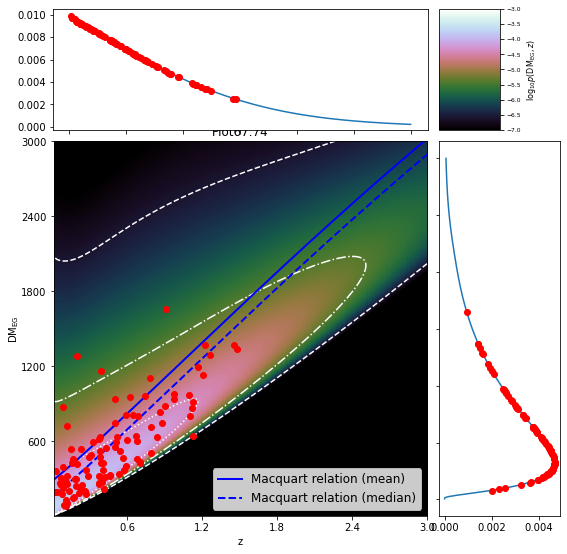

In [26]:
misc_functions.plot_grid_2(grid2.rates,grid2.zvals,grid2.dmvals,zmax=3,DMmax=3000,
                             #name=os.path.join(Location,prefix+'ICS_optimised_grid.pdf'),
                             norm=2,log=True,label='$\\log_{10} p({\\rm DM}_{\\rm EG},z)$',
                             project=True,FRBDM=survey2.DMEGs,FRBZ=survey2.frbs["Z"],Aconts=[0.01,0.1,0.5],
                           Macquart=grid2.state, showplot=True)